In [ ]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

img=cv2.imread('grayscale.jpg',0)
x_arr=[]

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    x_arr.append(img[i][j])

In [ ]:
epsilon = 0.02
Dold = 0
split_val = 128
min_arr_sub_val = 64
max_arr_sub_val = 192
flag = False
Iteration=0
while not flag:
  Iteration+=1
  print("Iteration: ",Iteration)
  first_arr = []
  second_arr = []
  for x in x_arr:
    if x < split_val:
      first_arr.append(x)
    else:
      second_arr.append(x)
  
  sq_less_arr = [(x - min_arr_sub_val)**2 for x in first_arr]
  sq_more_arr = [(y - max_arr_sub_val)**2 for y in second_arr]
  Dnew = sum(sq_less_arr) + sum(sq_more_arr)

  print("First Interval: " ,first_arr)
  print("Second Interval: ",second_arr)
  print("Distortion: ",Dnew)
  
  if abs(Dnew - Dold) < epsilon:
    flag = True
    continue
  Dold = Dnew

  if len(first_arr)>0:
    min_arr_sub_val = math.ceil(sum(first_arr)/len(first_arr)) 
  else:
    min_arr_sub_val = 0

  if len(second_arr)>0:
    max_arr_sub_val = math.ceil(sum(second_arr)/len(second_arr))
  else:
    max_arr_sub_val = 0
  split_val = (min_arr_sub_val + max_arr_sub_val) // 2
  print(" ")

print("Final Answer")

print("Threshold Value: " ,split_val)
print("first Array: ",first_arr)
low = math.ceil(sum(first_arr)/len(first_arr))
print("Average of first Array: ",low)
print("Second Array: ",second_arr)
high = math.ceil(sum(second_arr)/len(second_arr))
print("Average of Second Array: ",high)

Iteration:  1
First Interval:  [119, 120, 121, 122, 122, 123, 124, 125, 126, 126, 126, 126, 126, 127, 127, 127, 126, 126, 125, 124, 123, 121, 120, 119, 119, 118, 117, 116, 116, 116, 116, 116, 117, 118, 119, 118, 118, 119, 119, 120, 120, 121, 121, 122, 123, 123, 123, 123, 122, 122, 122, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 120, 119, 119, 118, 119, 119, 119, 118, 118, 117, 117, 116, 115, 115, 114, 113, 113, 112, 112, 111, 111, 111, 110, 110, 110, 109, 109, 109, 108, 109, 111, 112, 113, 114, 115, 116, 116, 117, 118, 119, 120, 121, 121, 122, 122, 123, 124, 125, 125, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 126, 125, 125, 125, 124, 124, 123, 122, 122, 122, 121, 120, 119, 118, 118, 117, 117, 116, 115, 115, 115, 116, 116, 117, 117, 117, 117, 117, 117, 118, 119, 120, 121, 121, 121, 121, 123, 123, 124, 125, 125, 126, 127, 127, 125, 124, 122, 122, 121, 120, 119, 119, 119, 119, 119, 120, 121, 121, 122, 121, 121, 122, 122, 123, 123, 124, 124, 124, 124, 124, 124, 124

[[154 154 154 ... 154 154 154]
 [154 154 154 ... 154 154 154]
 [154 154 154 ... 154 154 154]
 ...
 [ 72  72  72 ...  72  72  72]
 [ 72  72  72 ...  72  72  72]
 [ 72  72  72 ...  72  72  72]]


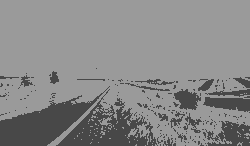

In [ ]:
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if(img[i][j]<=76):
      img[i][j]=low
    elif(img[i][j]>=77):
      img[i][j]=high

print(img)
cv2_imshow(img)